<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/Quantum_Ising_Model_Phase_Transition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
# add path to .py files for import
import sys
sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

Cloning into 'Tensor-Networks-Simple-Update'...
remote: Enumerating objects: 392, done.
remote: Counting objects: 100% (392/392), done.
remote: Compressing objects: 100% (327/327), done.
remote: Total 392 (delta 224), reused 141 (delta 60), pack-reused 0
Receiving objects: 100% (392/392), 1.02 MiB | 5.96 MiB/s, done.
Resolving deltas: 100% (224/224), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from TensorNetwork import TensorNetwork
import SimpleUpdate as su
from tqdm.auto import tqdm


np.random.seed(216)

plt.rcParams.update({'font.size': 16, 
                     "figure.facecolor": 'white', 
                     "axes.facecolor": 'white', 
                     "savefig.facecolor": 'white', 
                     'savefig.edgecolor' : 'white', 
                     'figure.edgecolor' : 'white'})

# Simulating the Quantum Phase Transition of an Ising Transverse Field (ITF)Hamiltonian on an infinite $2D$ Lattice

The ITF Hamiltonian is given by

\begin{align}
    H = -J\sum_{<i, j>}\sigma_i^z \cdot \sigma_j^z - h\sum_{i}\sigma_i^x
\end{align}

In [4]:
# The Tensor Network structure matrix
ising_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                   [1, 2, 0, 0, 3, 4, 0, 0],
                                   [0, 0, 1, 2, 0, 0, 3, 4,],
                                   [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_ising = [2]
error = 1e-6
max_iterations = 200
ising_energy = []
ising_z_magnetizaton = []
ising_x_magnetizaton = []

j_ij_ising = [-1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = -np.linspace(0, 4, 60)

# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])

s_i = [pauli_z]
s_j = [pauli_z]
s_k = [pauli_x]


# Run
for d_max in d_max_ising:
    for h in tqdm(h_k):
        ising = TensorNetwork(structure_matrix=ising_structure_matrix, 
                              virtual_size=2)
        ising_su = su.SimpleUpdate(tensor_network=ising, 
                                  dts=dts, 
                                  j_ij=j_ij_ising, 
                                  h_k=h, 
                                  s_i=s_i, 
                                  s_j=s_j, 
                                  s_k=s_k, 
                                  d_max=d_max, 
                                  max_iterations=max_iterations, 
                                  convergence_error=error, 
                                  log_energy=False,
                                  print_process=False)
        ising_su.run()
        energy = ising_su.energy_per_site()
        z_magnetization = ising_su.expectation_per_site(pauli_z)
        x_magnetization = ising_su.expectation_per_site(pauli_x)
        print('| D max: {:3d} | h: {:3.10f} | Energy: {:3.10f} | Mz: {:3.10f} | Mx: {:3.10f} |'
        .format(d_max, h, energy, z_magnetization, x_magnetization))
        ising_energy.append(energy)
        ising_z_magnetizaton.append(z_magnetization)
        ising_x_magnetizaton.append(x_magnetization)

| D max:   2 | h: -0.0000000000 | Energy: -2.0000000000 | Mz: 1.0000000000 | Mx: 0.0000000090 |
| D max:   2 | h: -0.0677966102 | Energy: -2.0005745613 | Mz: -0.9998563340 | Mx: 0.0169499902 |
| D max:   2 | h: -0.1355932203 | Energy: -2.0022984098 | Mz: -0.9994249884 | Mx: 0.0339049469 |
| D max:   2 | h: -0.2033898305 | Energy: -2.0051720403 | Mz: -0.9987049166 | Mx: 0.0508698690 |
| D max:   2 | h: -0.2711864407 | Energy: -2.0091962828 | Mz: -0.9976944259 | Mx: 0.0678489093 |
| D max:   2 | h: -0.3389830508 | Energy: -2.0143722930 | Mz: 0.9963910106 | Mx: 0.0848480131 |
| D max:   2 | h: -0.4067796610 | Energy: -2.0207015678 | Mz: 0.9947915057 | Mx: 0.1018718221 |
| D max:   2 | h: -0.4745762712 | Energy: -2.0281859415 | Mz: 0.9928919708 | Mx: 0.1189254028 |
| D max:   2 | h: -0.5423728814 | Energy: -2.0368275915 | Mz: -0.9906876793 | Mx: 0.1360138868 |
| D max:   2 | h: -0.6101694915 | Energy: -2.0466290429 | Mz: -0.9881730808 | Mx: 0.1531424914 |
| D max:   2 | h: -0.6779661017 | 

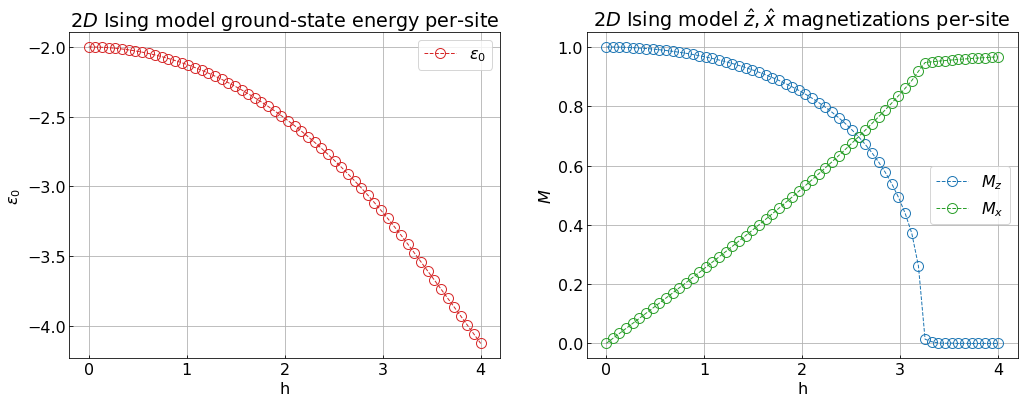

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
ax[0].plot(-h_k, ising_energy, '--o', label=r'$\epsilon_0$', color='tab:red', 
           markerfacecolor='none', linewidth=1, markersize=10)
ax[0].set_xlabel(r'h')
ax[0].set_ylabel(r'$\epsilon_0$')
ax[0].set_title('$2D$ Ising model ground-state energy per-site')
ax[0].tick_params(direction='in', axis='both')
ax[0].grid()
ax[0].legend()

ax[1].plot(-h_k, np.abs(np.array(ising_z_magnetizaton)), '--o', label=r'$M_z$', 
           color='tab:blue', markerfacecolor='none', linewidth=1, markersize=10)
ax[1].plot(-h_k, ising_x_magnetizaton, '--o', label=r'$M_x$', color='tab:green', 
           markerfacecolor='none', linewidth=1, markersize=10)
ax[1].set_xlabel(r'h')
ax[1].set_ylabel(r'$M$')
ax[1].set_title(r'$2D$ Ising model $\hat{z}, \hat{x}$ magnetizations per-site')
ax[1].tick_params(direction='in', axis='both')
ax[1].grid()
ax[1].legend()